### Digit Recognition Project

In [102]:
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm

import matplotlib.pyplot as plt

RNG_SEED = 42 # Meaning of Life

### Load data

In [103]:
labeled_images = np.load("labeled_images.npy")
labeled_digits = np.load("labeled_digits.npy")

autograder_images = np.load("autograder_images.npy")

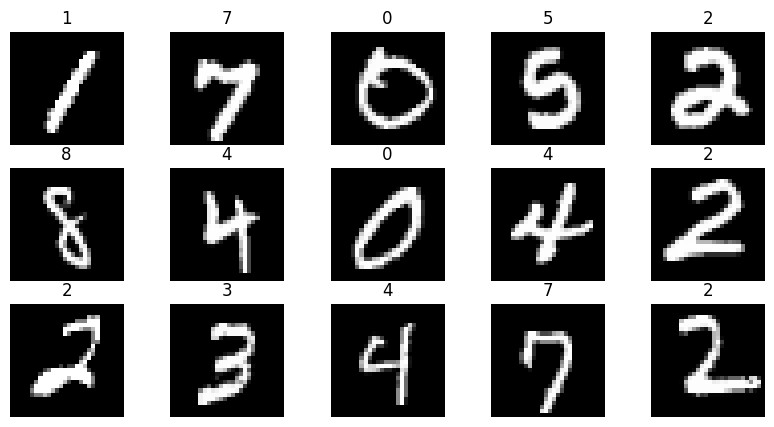

In [104]:
# this is an array containing all the 3750 images of size 28 times 28 pixels:
labeled_images.shape

# Draw all images
fig, axes = plt.subplots(3, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(labeled_images[i], cmap='gray')
    ax.set_title(labeled_digits[i])
    ax.axis('off')
plt.show()

### Scale data

In [105]:
scaler = MinMaxScaler()
labeled_images_reshaped = labeled_images.reshape(-1, 1)
scaled_labeled_images = scaler.fit_transform(labeled_images_reshaped).reshape(labeled_images.shape)

In [106]:
# this is an array containing the digit corresponding to each image:
labeled_digits[0:10]

array([1, 7, 0, 5, 2, 8, 4, 0, 4, 2])

# Regression with Default Hyperparameters

In [107]:
from sklearn.datasets import load_iris

iris = load_iris() # load dummy for now, we can replace

X = scaled_labeled_images.reshape(scaled_labeled_images.shape[0], -1) # replace with the real one
y = labeled_digits # replace with the real on 

In [108]:
models = [('Decision tree', DecisionTreeClassifier(random_state=RNG_SEED)), 
          ('k-Neighbors', KNeighborsClassifier()),
          ('SVC', SVC(random_state=RNG_SEED)), 
          ('SGD', SGDClassifier(random_state=RNG_SEED, loss='log_loss'))]

# Hyperparameter Optimization with GridSearch

In [ ]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RNG_SEED)

res = {}
for name, model in tqdm(models):
    params = {} # this has to be defined per model
    clf = GridSearchCV(model, params, cv=5)
    
    clf.fit(X_train, y_train)
    
    best_model = clf.best_estimator_
    y_pred = best_model.predict(X_test)
    
    res[name] = {
        "model": best_model,
        "best_params": clf.best_params_,
        "accuracy": accuracy_score(y_test, y_pred)
    }

100%|██████████| 4/4 [00:14<00:00,  3.53s/it]


In [97]:
res

{'Decision tree': {'model': DecisionTreeClassifier(random_state=42),
  'accuracy': 0.7146666666666667},
 'k-Neighbors': {'model': KNeighborsClassifier(),
  'accuracy': 0.9137777777777778},
 'SVC': {'model': SVC(random_state=42), 'accuracy': 0.9351111111111111},
 'SGD': {'model': SGDClassifier(loss='log_loss', random_state=42),
  'accuracy': 0.8497777777777777}}

100%|██████████| 1000/1000 [00:49<00:00, 20.39it/s]


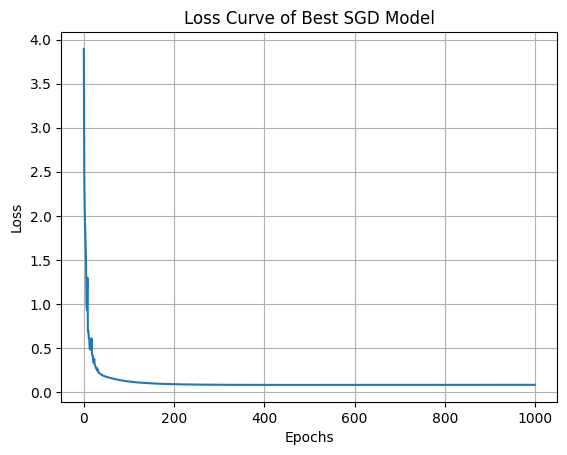

In [122]:
# Plot SGD
from sklearn.metrics import log_loss

best_sgd = SGDClassifier(random_state=RNG_SEED, max_iter=1000, warm_start=True, tol=1e-3, loss="log_loss")

loss = []
classes = np.unique(y)

for epoch in tqdm(range(1000)):
    best_sgd.partial_fit(X_train, y_train, classes=y)
    prob = best_sgd.predict_proba(X_train)

    epoch_loss = log_loss(y_train, prob)
    loss.append(epoch_loss)

plt.plot(loss)
plt.title("Loss Curve of Best SGD Model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid()
plt.show()

### Prepare autograder submission

In the autograder you will need to provide two things: 1) estimate of the accuracy of your model on unseen data, 2) the predictions on the autograder images. For the autograder images we only provide the images and not the class labels. Thus, you cannot compute the accuracy on this data yourself - you need to estimate that with labeled data that is provided (labeled_images, labeled_digits). We will calculate the accuracy for you on the autograder data and you will receive an automatic grade based on this. 

In [5]:

estimate = np.array([0.7]) # TODO Replace this with your estimate of the accuracy on new data
prediction = np.array([-1] * len(autograder_images)) # TODO Replace this with your predictions of your best model
# For example using something like:
# prediction = my_super_duper_model.predict(autograder_images) 

result = np.append(estimate, prediction)

# The code below will write your estimate and prediction to a file named autograder.txt
# You will need to upload this file to the Vocareum autograder
pd.DataFrame(result).to_csv("autograder.txt", index=False, header=False)